# Visualization Assignment #

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Source ###
Data has been acquired from 'https://www.metoffice.gov.uk/'. And is 
Data is 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/oxforddata.txt'

In [473]:
# Importing data
met=pd.read_csv(r'D:\met_oxford.csv')

# Defining Class of Function #

In [460]:
class see:
    """ 
    This class is custom generated, exclusively for viaualization of climate data.
    
    Input Data format:
    Class required monthly climate data in single Pandas DataFrame with following labels/columns.
    [year, month, rain, tmax, tmin, sun]
    
    where, 
    1. year = Years
    2. month = Months
    3. rain = Summed Monthly rainfall in milli-meters (mm)
    4. tmax = Averaged Maximum Temperature in degree centigrade (°C)
    5. tmin = Averaged Minimum Temperature in degree centigrade (°C)
    6. sun = Sunhine in Hours
    
    Class functions
    1. rain_monthly_pie = Function provides visualization of the monthly rainfall distribution in pie chart
    2. rain_boxplot = Function provide boxplot for rainfall monthly data
    3. temperature_sun_scatter = Function provide correlation scatterplot between monthly Temperature and sun variable.
    4. temperature_annual_timeline = Function will provide visualization of annual averaged temperature anomoly. 
    5. temperature_monthly = Function provide visualization of monthly averaged temperature.
        
    """
    
    
    def __init__(self,ds,fig_width,fig_heigh):
        """class variables
        ds = Pandas climate DataFrame
        w = fig_width = figure width
        h = fig_height = figure height
        """
        
        self.ds=ds
        self.w=fig_width
        self.h=fig_heigh

    
    def rain_monthly_pie(ds,w=8,h=5):
        
        # figure size
        plt.figure(figsize=(w,h))
        
        # listing months in string format
        label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
        
        # Determining mean of each month
        x=ds.groupby('mon').rain.mean().values
        
        # Pie chart
        plt.pie(x, labels = label, autopct='%0.2f%%' ,pctdistance = 0.8)
        
        # Title
        plt.title("Rainfall Distribution w.r.t to Months")
        
        
        
    def rain_boxplot(ds,w=8,h=5):
        
        # figure size
        plt.figure(figsize=(w,h))
        
        # boxplot
        plt.boxplot(ds['rain'])
        
        # y-axis label
        plt.ylabel('Rainfall in (mm)')
        
        # Title
        plt.title("Boxplot")
        
        # Legend
        plt.legend()
        
        
    def temperature_sun_scatter(ds,w=8,h=5):
        
        # figure size
        plt.figure(figsize=(w,h))
        
        # x-axis label
        plt.xlabel('Temperature (°C)', fontsize=14)
        
        # y-axis label
        plt.ylabel('Sunshine (hours)', fontsize=14)
        
        # Title
        plt.title('Correlation b/w Temperature (°C) and Sunshine (Hours) ')
        
        # Scatter plot minimum temperature vs sunshine
        plt.scatter(ds['tmin'], ds['sun'], c='red',marker='3', label='Maximum Temperature' )
        
        # Scatter plot maximum temperature vs sunshine
        plt.scatter(ds['tmax'], ds['sun'], c='blue',marker='*', label='Minimum Temperature')
        
        # legends
        plt.legend(fontsize=14)
        
    
    def temperature_annual_timeline(ds,w=12,h=5):
        
        # Determining averaged annual temperature
        tmin = ds.groupby('year').tmin.mean()
        tmax = ds.groupby('year').tmax.mean()
        
        # Determining average temperature of total record
        temperature_mean = 0.5*(tmin + tmax).mean()
        
        # Determining temperature anomoly
        temperature_minimum = tmin - temperature_mean
        temperature_maximum = tmax - temperature_mean
        
        ## Temperature Minimum
        # Figure
        plt.figure(figsize=(w,h))
        
        # subplotting 1
        plt.subplot(2,1,1)
        plt.ylabel('Minimum Temperature (°C)')
        plt.title('Annual Temperature Anomoly')
        # line plot
        plt.plot(temperature_minimum.index, temperature_minimum.values, fillstyle="none",color = 'blue',  linestyle='--', marker='o',  mfc='blue', label='Minimum Temperature')
        plt.legend()

        ## Temperature Minimum
        # subplotting 2
        plt.subplot(2,1,2)
        plt.xlabel('Annual Timeline')
        plt.ylabel('Maximum Temperature (°C)',)
        # line plot
        plt.plot(temperature_maximum.index, temperature_maximum.values, color = 'red',  linestyle='--', marker='o',  mfc='red', label='Maximum Temperature')
        plt.legend()

    
    def temperature_monthly(ds,w=12,h=5):
        
        # Determining averaged monthly temperature 
        temperature_minimum = ds.groupby('mon').tmin.mean()
        temperature_maximum = ds.groupby('mon').tmax.mean()
        temperature_mean = 0.5 * (temperature_minimum+temperature_maximum)

        # Figure
        plt.figure(figsize=(w,h))
        plt.xlabel('Months', fontsize=14)
        plt.ylabel('Temperature (°C)', fontsize=14)
        plt.title('Mean Monthly Temperature')

        # bar plot of maximum and minimum temperature
        plt.bar(temperature_maximum.index, temperature_maximum.values, color = 'red',label='Maximum Temperature')
        plt.bar(temperature_minimum.index, temperature_minimum.values,color='blue' , label='Minimum Temperature')
        
        # line plot of average temperature
        plt.plot(temperature_minimum.index, temperature_mean.values, color = 'black',  linestyle='--', marker='3',  mfc='red',label='Mean Temperature')

        plt.legend(fontsize=14)   
    

# Doc String #

In [467]:
print('"see" class instruction \n', see.__doc__)

"see" class instruction 
  
    This class is custom generated, exclusively for viaualization of climate data.
    
    Input Data format:
    Class required monthly climate data in single Pandas DataFrame with following labels/column.
    [year, month, rain, tmax, tmin, sun]
    
    where, 
    1. year = Years
    2. month = Months
    3. rain = Summed Monthly rainfall in milli-meters (mm)
    4. tmax = Averaged Maximum Temperature in degree centigrade (°C)
    5. tmin = Averaged Minimum Temperature in degree centigrade (°C)
    6. sun = Sunhine in Hours
    
    It contain following functions
    1. rain_monthly_pie = Function provides visualization of the monthly rainfall distribution in pie chart
    2. rain_boxplot = Function provide boxplot for rainfall monthly data
    3. temperature_sun_scatter = Function provide correlation scatterplot between monthly Temperature and sun variable.
    4. temperature_annual_timeline = Function will provide visualization of annual averaged temp

# Analyzing Data

In [472]:
describe=met.describe().iloc[:,2:]
np.round(describe,1)

,tmax,tmin,rain,sun
count,804.0,804.0,804.0,804.0
mean,13.9,6.3,54.1,126.2
std,5.7,4.3,31.5,63.1
min,-0.2,-5.8,1.4,18.2
25%,9.1,2.9,31.0,70.0
50%,13.8,5.9,49.3,120.4
75%,19.1,10.5,73.0,170.6
max,26.8,15.4,175.5,301.0


## Correlation between temperature and Sunshine hours ##

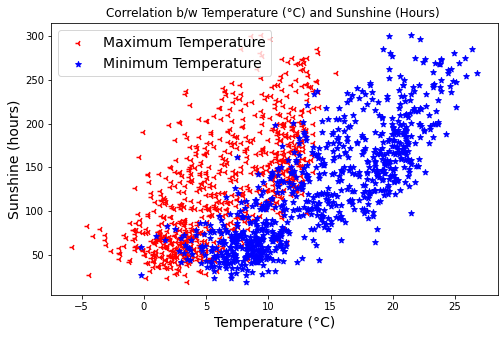

In [465]:
sunshine=see.temperature_sun_scatter(met)

# Temperature Analysis #

## Annual Averaged Temperature ##

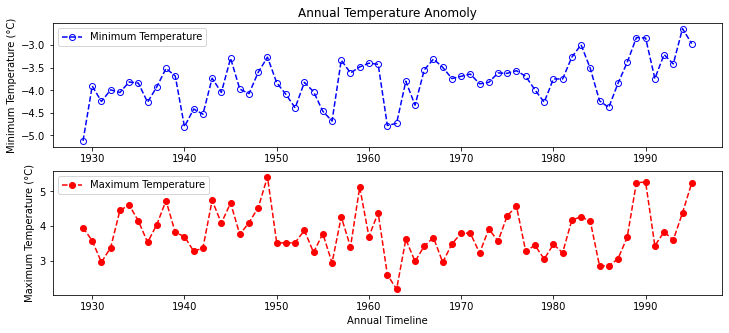

In [466]:
anunal_temperature=see.temperature_annual_timeline(met)

## Monthly Averaged Temperature ##

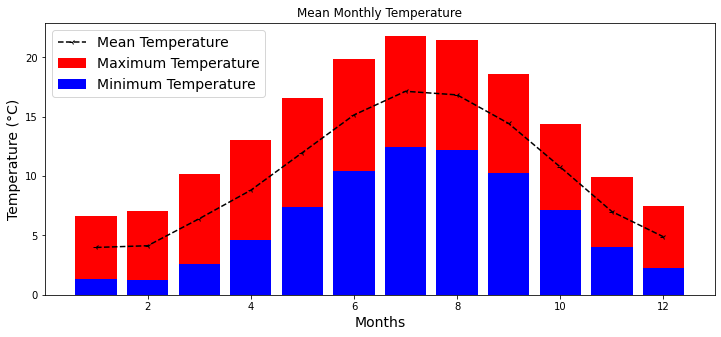

In [468]:
monthly_temperature=see.temperature_monthly(met)

# Rainfall Analysis #

## Monthly Rain Distribution in Percentage ##

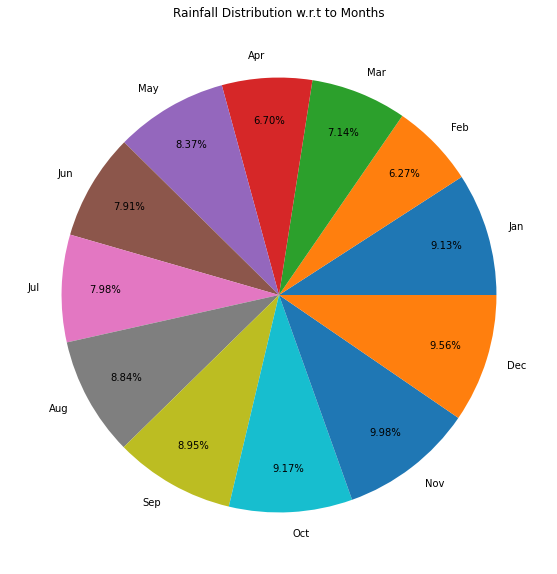

In [470]:
distribution=see.rain_monthly_pie(met,w=10,h=10)

## Outlier Detection Using Boxplots ##

No handles with labels found to put in legend.


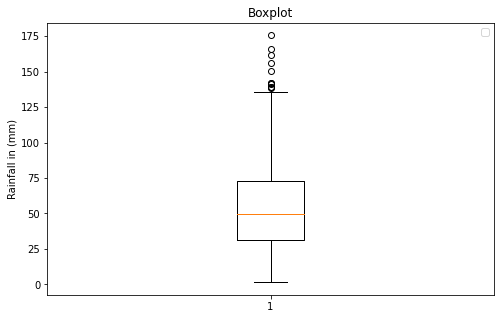

In [471]:
boxplot=see.rain_boxplot(met)